In [123]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd
import matplotlib.pyplot as plt
from matplotlib.table import Table

In [124]:
# GridWorld class: This class represents the grid world environment.
# It should have the following methods:
class GridWorld():
#10%
 def __init__(self):
 # Initializes the grid world by defining the grid layout,
 # including blocked cells and the goal cell.
  self.S0 = [0, 0]
  self.ST = [4, 0]
  self.blocked_cells  = [[3,0],[1,1],[3,1],[0,3],[2,3],[2,4]]
  self.WORLD_SIZE = [5,5]
  self.ACTIONS = [np.array([-1, 0]), np.array([0, 1]), np.array([1, 0]), np.array([0, -1])]
 pass

 def is_goal(self, state):
 # Checks if the given state is the goal state.
  if state == [4, 0]:
    return 1
  else:
    return 0

 def is_blocked(self, state):
  self.state = state
 # Checks if the given state is a blocked cell.
  if [self.state[0], self.state[1]] in self.blocked_cells:
    return 1
  else:
    return 0

 def reward(self, state):
  self.state = state
  if [self.state[0], self.state[1]] == self.ST:
    reward = 10
  else:
    reward = -1
  return reward

 def step(self, state, action):
  self.state = state
  self.action = action
  next_state = (np.array(self.state) + np.array(self.action)).tolist()
  if next_state[0] < 0 or next_state[0] > 4 or next_state[1] < 0 or next_state[1] > 4 or [next_state[0], next_state[1]] in self.blocked_cells:
    next_state = self.state
  if [self.state[0], self.state[1]] == self.ST:
    reward = 10
  else:
    reward = -1

  return next_state, reward



In [125]:
Grid = GridWorld()

In [126]:
# SarsaAgent class: This class represents an agent using the SARSA algorithm.
# It should have the following methods:
class SarsaAgent:
#10%
 def __init__(self):
 # Initializes the agent with the given epsilon (exploration rate),
 # alpha (learning rate), and gamma (discount factor).
  self.gamma = 1
  self.alpha = 0.1
  self.epsilon = 0.3
  self.qtable = np.zeros([5,5,4])
  self.returns = []
 pass

 def select_action(self, state, epsilon, qtable):
 # Selects an action for the given state based on the SARSA algorithm.
 # Returns the selected action.
  if rd.rand() >= self.epsilon:
    return np.argmax(self.qtable[state[0],state[1]])
  else:
    return rd.randint(self.qtable.shape[2])

 def update_q_table(self, state, action, reward, next_state, next_action):
 # Updates the agent's Q-table based on the SARSA update rule
 # using the received reward, next state, and next action.
  self.qtable[self.state[0], self.state[1], self.action] = self.qtable[self.state[0], self.state[1], self.action] + self.alpha * (reward + self.gamma * self.qtable[self.next_state[0], self.next_state[1], self.next_action] - self.qtable[state[0], state[1], action])
  return self.qtable

 def reset(self):
 # Resets the agent's internal state at the beginning of each episode.
  qtable = rd.rand(5,5,4)
  returns = []
  pass

In [127]:
Agent = SarsaAgent()

In [128]:
# main() function: This function should simulate the grid world problem
# using the SARSA algorithm and output the optimal path taken by the agent.
def main():
#7%
 # Simulate the grid world problem using the SARSA algorithm
 # and output the optimal path taken by the agent.
  Grid = GridWorld()
  Agent = SarsaAgent()
  returns = []
  for episode in range(1000):
    G = 0
    state = Grid.S0
    action = Agent.select_action(state, Agent.epsilon, Agent.qtable)
    while state != Grid.ST:
      state_n, reward = Grid.step(state, Grid.ACTIONS[action])
      action_n = Agent.select_action(state_n, Agent.epsilon, Agent.qtable)
      Agent.qtable[state[0], state[1], action] = Agent.qtable[state[0], state[1], action] + Agent.alpha * (reward + Agent.gamma * Agent.qtable[state_n[0], state_n[1], action_n] - Agent.qtable[state[0], state[1], action])
      G += reward
      action = action_n
      state = state_n
  ########################
    returns.append(G)
    
  return returns
# evaluate() function: This function should import the stored data and display the learning curve
# by plotting a line graph or using a suitable visualization method, with the
# episode number on the x-axis and the total accumulated rewards on the y-axis.


In [129]:
def averages(a):
  return [np.average(a[:i+1]) for i in range(len(a))]

In [130]:
def evaluate(returns):
#7%
# Import the stored data and display the learning curve.
  plt.figure()
  plt.plot(averages(returns))
  plt.ylim(-150,0)

[-347, -289, -67, -96, -73, -87, -171, -56, -65, -51, -89, -12, -105, -54, -103, -95, -43, -48, -40, -118, -15, -34, -51, -86, -18, -21, -84, -26, -11, -47, -41, -30, -54, -19, -26, -27, -43, -29, -30, -18, -13, -59, -18, -38, -15, -20, -43, -12, -57, -15, -22, -12, -13, -25, -25, -18, -23, -11, -8, -76, -27, -13, -20, -21, -38, -10, -11, -23, -13, -10, -34, -15, -21, -12, -22, -15, -23, -10, -29, -26, -17, -14, -14, -15, -11, -54, -10, -19, -14, -12, -13, -18, -10, -33, -13, -12, -10, -12, -8, -15, -12, -12, -13, -17, -14, -9, -10, -13, -11, -14, -12, -10, -11, -17, -8, -13, -10, -15, -13, -15, -49, -9, -21, -21, -17, -19, -11, -9, -19, -10, -34, -10, -8, -9, -12, -25, -38, -9, -8, -14, -8, -9, -11, -10, -12, -40, -8, -10, -16, -16, -13, -8, -9, -39, -16, -12, -9, -9, -12, -10, -28, -10, -18, -13, -15, -9, -11, -10, -12, -30, -21, -16, -15, -13, -20, -12, -14, -26, -9, -9, -10, -9, -16, -19, -15, -14, -12, -12, -11, -18, -16, -12, -8, -10, -12, -13, -10, -27, -11, -11, -10, -11, -12, 

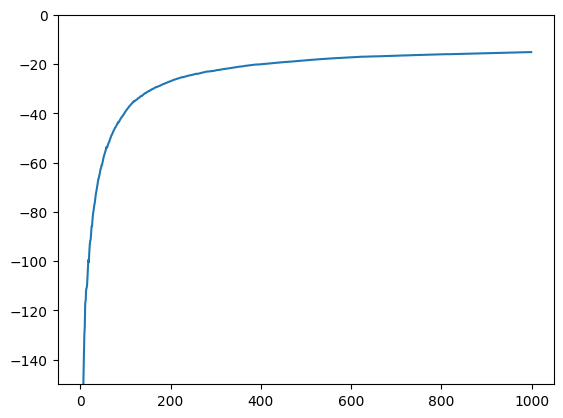

In [133]:
returns = main()
print(returns)
evaluate(returns)